In [42]:
import numpy as np
import pandas as pd
import joblib
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

%matplotlib inline

In [2]:
def tl_features(tl):
    
    trainf_path      = tl + '/' + tl + '_train_features.pkl'
    validationf_path = tl + '/' + tl + '_validation_features.pkl'
    testf_path       = tl + '/' + tl + '_test_features.pkl'
    trainl_path      = tl + '/' + tl + '_train_labels.pkl'
    validationl_path = tl + '/' + tl + '_validation_labels.pkl'
    testl_path       = tl + '/' + tl + '_test_labels.pkl'
    
    train_features      = joblib.load(trainf_path)
    validation_features = joblib.load(validationf_path)
    test_features       = joblib.load(testf_path)
    train_labels        = to_categorical(joblib.load(trainl_path))
    validation_labels   = to_categorical(joblib.load(validationl_path))
    test_labels         = to_categorical(joblib.load(testl_path))
    
    return train_features, validation_features, test_features, train_labels, validation_labels, test_labels

In [3]:
def get_metrics(model, test_features, test_labels):
    
    predictions = model.predict_classes(test_features)
    class_map = {'0' : 'air_conditioner', '1' : 'car_horn', '2' : 'children_playing', '3' : 'dog_bark', '4' : 'drilling', 
                 '5' : 'engine_idling', '6' : 'gun_shot', '7' : 'jackhammer', '8' : 'siren', '9' : 'street_music'}
    
    true_labels      = [class_map[str(np.argmax(label))] for label in test_labels]
    predicted_labels = [class_map[str(label)] for label in predictions]
    
    Accuracy  = np.round(metrics.accuracy_score(true_labels, predicted_labels), 4)
    Precision = np.round(metrics.precision_score(true_labels, predicted_labels, average='weighted'), 4)
    Recall    = np.round(metrics.recall_score(true_labels, predicted_labels, average='weighted'), 4)
    F1_Score  = np.round(metrics.f1_score(true_labels, predicted_labels, average='weighted'), 4)
    
    return [Accuracy, Precision, Recall, F1_Score]

In [24]:
def performance_plot(model_name, history):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle(model_name, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.2)

    epochs = list(range(1,51))
    ax1.plot(epochs, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epochs, history.history['loss'], label='Train Loss')
    ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

In [43]:
def plot_cm(model, test_features, test_labels):
    
    predictions = model.predict_classes(test_features)
    class_map = {'0' : 'air_conditioner', '1' : 'car_horn', '2' : 'children_playing', '3' : 'dog_bark', '4' : 'drilling', 
                 '5' : 'engine_idling', '6' : 'gun_shot', '7' : 'jackhammer', '8' : 'siren', '9' : 'street_music'}
    
    true_labels      = [int(np.argmax(label)) for label in test_labels]
    predicted_labels = [int(label) for label in predictions]

    cm = metrics.confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [4]:
def get_model(train_features):
   
    model = models.Sequential()
    model.add(layers.Dense(1024, activation='relu', input_shape=(train_features.shape[1],)))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
    return model

In [8]:
def train_model(model, train_features, train_labels, validation_features, validation_labels):
    
    history = model.fit(train_features, train_labels, epochs=50, batch_size=128,
                        validation_data=(validation_features, validation_labels), 
                        shuffle=True, verbose=1)
    return history

In [16]:
results = pd.DataFrame()
results['metrics'] = ['Accuracy', 'Precision', 'Recall', 'F1_Score']

#results = pd.read_csv('results.csv')

In [9]:
tl_name_1 = 'Vgg16'
Vgg16_train_f, Vgg16_validation_f, Vgg16_test_f, Vgg16_train_l, Vgg16_validation_l, Vgg16_test_l = tl_features(tl_name_1)
Vgg16_train_f.shape, Vgg16_validation_f.shape, Vgg16_test_f.shape, Vgg16_train_l.shape, Vgg16_validation_l.shape, Vgg16_test_l.shape

((18300, 2048),
 (6100, 2048),
 (6100, 2048),
 (18300, 10),
 (6100, 10),
 (6100, 10))

In [10]:
tl_model_1 = get_model(Vgg16_train_f)
tl_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)              

In [15]:
history_vgg16 = train_model(tl_model_1, Vgg16_train_f, Vgg16_train_l, Vgg16_validation_f, Vgg16_validation_l)

Train on 18300 samples, validate on 6100 samples
Epoch 1/50
18300/18300 [==============================] - 15s 804us/sample - loss: 2.3800 - accuracy: 0.3946 - val_loss: 1.0849 - val_accuracy: 0.6554
Epoch 2/50
18300/18300 [==============================] - 12s 681us/sample - loss: 1.1904 - accuracy: 0.5949 - val_loss: 0.8678 - val_accuracy: 0.7197
Epoch 3/50
18300/18300 [==============================] - 12s 644us/sample - loss: 0.9748 - accuracy: 0.6804 - val_loss: 0.7595 - val_accuracy: 0.7695
Epoch 4/50
18300/18300 [==============================] - 12s 668us/sample - loss: 0.8355 - accuracy: 0.7261 - val_loss: 0.6835 - val_accuracy: 0.7925
Epoch 5/50
18300/18300 [==============================] - 13s 684us/sample - loss: 0.7730 - accuracy: 0.7533 - val_loss: 0.6683 - val_accuracy: 0.8002
Epoch 6/50
18300/18300 [==============================] - 12s 653us/sample - loss: 0.6967 - accuracy: 0.7750 - val_loss: 0.6173 - val_accuracy: 0.8072
Epoch 7/50
18300/18300 [=====================

In [17]:
results['Vgg16'] = get_metrics(tl_model_1, Vgg16_test_f, Vgg16_test_l)

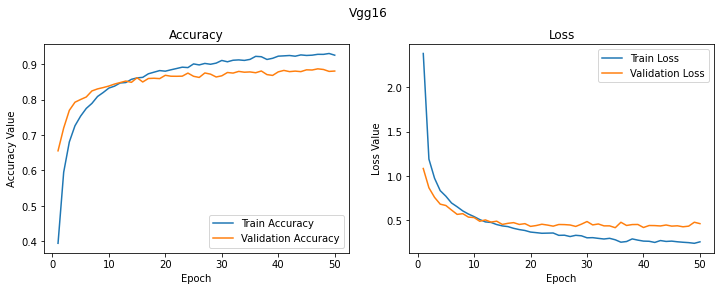

In [25]:
performance_plot(tl_name_1, history_vgg16)

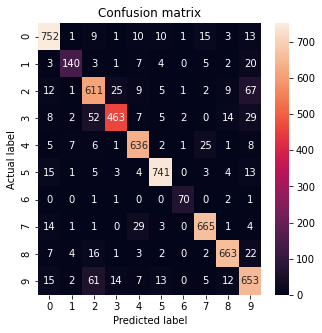

In [44]:
plot_cm(tl_model_1, Vgg16_test_f, Vgg16_test_l)

In [45]:
tl_model_1.save('Vgg16_model.h5')

In [11]:
tl_name_2 = 'ResNet50'
ResNet50_train_f, ResNet50_validation_f, ResNet50_test_f, ResNet50_train_l, ResNet50_validation_l, ResNet50_test_l = tl_features(tl_name_2)
ResNet50_train_f.shape, ResNet50_validation_f.shape, ResNet50_test_f.shape, ResNet50_train_l.shape, ResNet50_validation_l.shape, ResNet50_test_l.shape

((18300, 8192),
 (6100, 8192),
 (6100, 8192),
 (18300, 10),
 (6100, 10),
 (6100, 10))

In [12]:
tl_model_2 = get_model(ResNet50_train_f)
tl_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)              

In [47]:
history_resnet50 = train_model(tl_model_2, ResNet50_train_f, ResNet50_train_l, ResNet50_validation_f, ResNet50_validation_l)

Train on 18300 samples, validate on 6100 samples
Epoch 1/50
18300/18300 [==============================] - 21s 1ms/sample - loss: 0.6768 - accuracy: 0.7861 - val_loss: 0.5519 - val_accuracy: 0.8220
Epoch 2/50
18300/18300 [==============================] - 22s 1ms/sample - loss: 0.5836 - accuracy: 0.8176 - val_loss: 0.4939 - val_accuracy: 0.8423
Epoch 3/50
18300/18300 [==============================] - 21s 1ms/sample - loss: 0.5126 - accuracy: 0.8369 - val_loss: 0.4613 - val_accuracy: 0.8451
Epoch 4/50
18300/18300 [==============================] - 21s 1ms/sample - loss: 0.4475 - accuracy: 0.8552 - val_loss: 0.4345 - val_accuracy: 0.8585
Epoch 5/50
18300/18300 [==============================] - 21s 1ms/sample - loss: 0.4171 - accuracy: 0.8684 - val_loss: 0.4148 - val_accuracy: 0.8656
Epoch 6/50
18300/18300 [==============================] - 20s 1ms/sample - loss: 0.3867 - accuracy: 0.8803 - val_loss: 0.4492 - val_accuracy: 0.8652
Epoch 7/50
18300/18300 [==============================] -

In [48]:
results['ResNet50'] = get_metrics(tl_model_2, ResNet50_test_f, ResNet50_test_l)

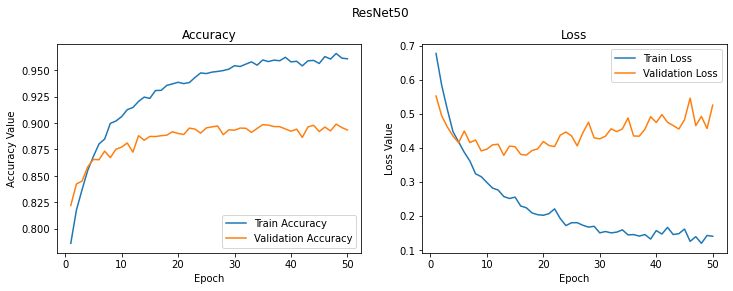

In [49]:
performance_plot(tl_name_2, history_resnet50)

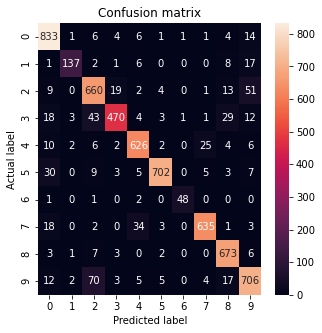

In [50]:
plot_cm(tl_model_2, ResNet50_test_f, ResNet50_test_l)

In [52]:
tl_model_2.save('ResNet50_model.h5')

In [53]:
tl_name_3 = 'Vgg19'
Vgg19_train_f, Vgg19_validation_f, Vgg19_test_f, Vgg19_train_l, Vgg19_validation_l, Vgg19_test_l = tl_features(tl_name_3)
Vgg19_train_f.shape, Vgg19_validation_f.shape, Vgg19_test_f.shape, Vgg19_train_l.shape, Vgg19_validation_l.shape, Vgg19_test_l.shape

((18300, 2048),
 (6100, 2048),
 (6100, 2048),
 (18300, 10),
 (6100, 10),
 (6100, 10))

In [54]:
tl_model_3 = get_model(Vgg19_train_f)
tl_model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_16 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dropout_17 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)              

In [55]:
history_vgg19 = train_model(tl_model_3, Vgg19_train_f, Vgg19_train_l, Vgg19_validation_f, Vgg19_validation_l)

Train on 18300 samples, validate on 6100 samples
Epoch 1/50
18300/18300 [==============================] - 11s 575us/sample - loss: 3.0464 - accuracy: 0.3320 - val_loss: 1.3314 - val_accuracy: 0.5587
Epoch 2/50
18300/18300 [==============================] - 8s 453us/sample - loss: 1.3995 - accuracy: 0.5207 - val_loss: 1.0737 - val_accuracy: 0.6452
Epoch 3/50
18300/18300 [==============================] - 8s 463us/sample - loss: 1.1785 - accuracy: 0.6079 - val_loss: 0.9417 - val_accuracy: 0.7221
Epoch 4/50
18300/18300 [==============================] - 8s 450us/sample - loss: 1.0478 - accuracy: 0.6566 - val_loss: 0.8305 - val_accuracy: 0.7370
Epoch 5/50
18300/18300 [==============================] - 9s 482us/sample - loss: 0.9609 - accuracy: 0.6840 - val_loss: 0.7832 - val_accuracy: 0.7541
Epoch 6/50
18300/18300 [==============================] - 9s 472us/sample - loss: 0.8983 - accuracy: 0.7127 - val_loss: 0.7884 - val_accuracy: 0.7546
Epoch 7/50
18300/18300 [==========================

In [56]:
results['Vgg19'] = get_metrics(tl_model_3, Vgg19_test_f, Vgg19_test_l)

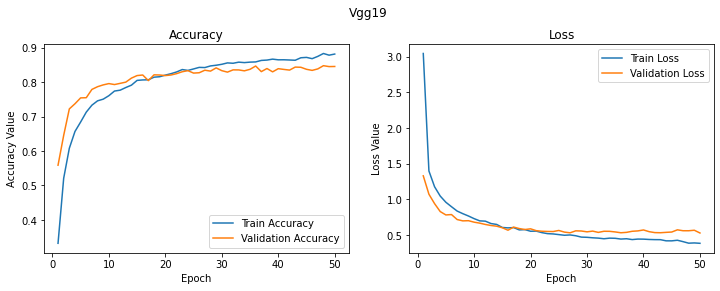

In [57]:
performance_plot(tl_name_3, history_vgg19)

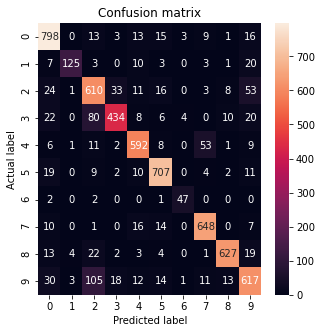

In [58]:
plot_cm(tl_model_3, Vgg19_test_f, Vgg19_test_l)

In [59]:
tl_model_3.save('Vgg19_model.h5')

In [61]:
results.to_csv('results.csv')

In [60]:
results

,metrics,Vgg16,ResNet50,Vgg19
0,Accuracy,0.8843,0.9000,0.8533
1,Precision,0.8856,0.9020,0.8560
2,Recall,0.8843,0.9000,0.8533
3,F1_Score,0.8843,0.8998,0.8530
